# Visualization of an astrophysical simulation

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import numpy as np

## Read in density file

In [7]:
fname = "density_projection.dat"
d = np.fromfile(fname,dtype=np.float32)
d = np.reshape(d,(512,512))

## Read in energy file

In [8]:
fname = "energy_projection.dat"
energy = np.fromfile(fname,dtype=np.float32)
energy = np.reshape(energy,(512,512))

## Plot using default color map

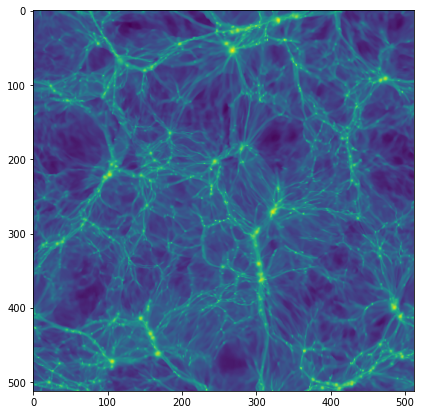

In [9]:
d_log = np.log10(d)
f = plt.figure(figsize=(7,7))
plt.imshow(d_log)

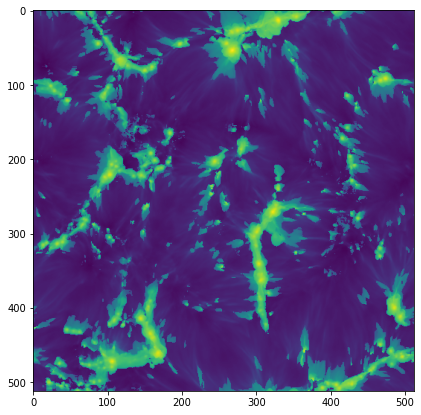

In [6]:
e_log = np.log10(energy)
f = plt.figure(figsize=(7,7))
plt.imshow(e_log)

## Make a 3-color image

In [10]:
d_min = d_log.min()
d_max = d_log.max()

v = (d_log - d_min)/(d_max - d_min)
s = 1.0 - v

In [11]:
e_min = e_log.min()
e_max = e_log.max()

h = 0.8 - 0.2*(e_log - e_min)/(e_max - e_min)

### Make HSV image then convert to RGB

In [12]:
hsv_image = np.zeros((512,512,3))

hsv_image[:,:,0] = h
hsv_image[:,:,1] = s
hsv_image[:,:,2] = v

rgb_image = colors.hsv_to_rgb(hsv_image)

### Show the 3-color image

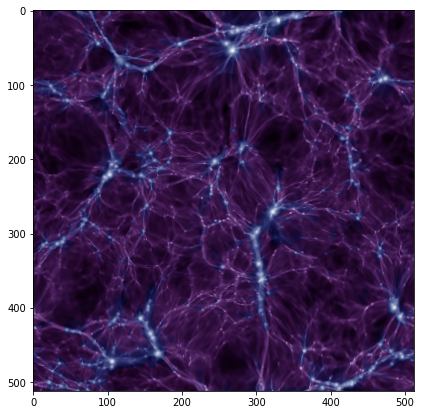

In [13]:
f = plt.figure(figsize=(7,7))
plt.imshow(rgb_image)

## Save the figure

In [14]:
plt.imsave("3color_simulation_visualization.png", rgb_image)